### Importación de datos



In [2]:
from idlelib.colorizer import matched_named_groups

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend
from pandas.core.interchange.dataframe_protocol import DataFrame

url = 'base-de-datos-challenge1-latam/tienda_1 .csv'
url2 ='base-de-datos-challenge1-latam/tienda_2.csv'
url3 ='base-de-datos-challenge1-latam/tienda_3.csv'
url4 ='base-de-datos-challenge1-latam/tienda_4.csv'

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [3]:
ingreso_total_tienda1= tienda.Precio.sum()
ingreso_total_tienda2= tienda2.Precio.sum()
ingreso_total_tienda3= tienda3.Precio.sum()
ingreso_total_tienda4= tienda4.Precio.sum()

print("El ingreso total de la tienda 1 es: {:,.0f}\nEl ingreso total de la tienda 2 es: {:,.0f}\nEl ingreso total de la tienda 3 es: {:,.0f}\nEl ingreso total de la tienda 4 es: {:,.0f}".format(ingreso_total_tienda1,ingreso_total_tienda2,ingreso_total_tienda3,ingreso_total_tienda4))



El ingreso total de la tienda 1 es: 1,150,880,400
El ingreso total de la tienda 2 es: 1,116,343,500
El ingreso total de la tienda 3 es: 1,098,019,600
El ingreso total de la tienda 4 es: 1,038,375,700


In [4]:
valores_ingreso= pd.DataFrame([[ingreso_total_tienda1],[ingreso_total_tienda2],[ingreso_total_tienda3],[ingreso_total_tienda4]], columns=['Ingreso Total'], index=['Tienda 1','Tienda 2','Tienda 3','Tienda 4'])

# valores_ingreso.iloc[0]=valores_ingreso.iloc[0].apply('{:,.0f}'.format)
# valores_ingreso.iloc[1]=valores_ingreso.iloc[1].apply('{:,.0f}'.format)
# valores_ingreso.iloc[2]=valores_ingreso.iloc[2].apply('{:,.0f}'.format)
# valores_ingreso.iloc[3]=valores_ingreso.iloc[3].apply('{:,.0f}'.format)
valores_ingreso

,Ingreso Total
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


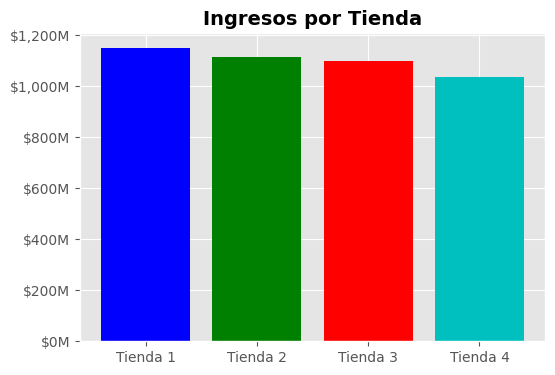

In [71]:
from matplotlib.ticker import FuncFormatter

x= tiendas
y = valores_ingreso['Ingreso Total']
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    return f'${x/1_000_000:,.0f}M'

# Realizar gráfica de suma total de ventas por tienda
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x, y, color = ['b','g','r','c'])
ax.yaxis.set_major_formatter(FuncFormatter(millones))
ax.set_title("Ingresos por Tienda", fontsize=14, fontweight='bold')

plt.show()

# Colores:
# b: blue
# g: green
# r: red
# c: cyan
# m: magenta
# y: yellow
# k: black
# w: white

# 2. Ventas por categoría

In [6]:
categoria_tienda1= tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)
categoria_tienda2= tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
categoria_tienda3= tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
categoria_tienda4= tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)
# categoria_tienda1
# categoria_tienda2





# TODO Revisar si se puede mejorar la impresion de los resultados
categorias_tiendas= pd.concat([tienda,tienda2,tienda3,tienda4])
categorias_agrupadas= categorias_tiendas.groupby('Categoría del Producto').size().sort_values(ascending=False)
categorias_agrupadas.name= 'Cantidad de productos vendidos'
categorias_agrupadas


Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: Cantidad de productos vendidos, dtype: int64

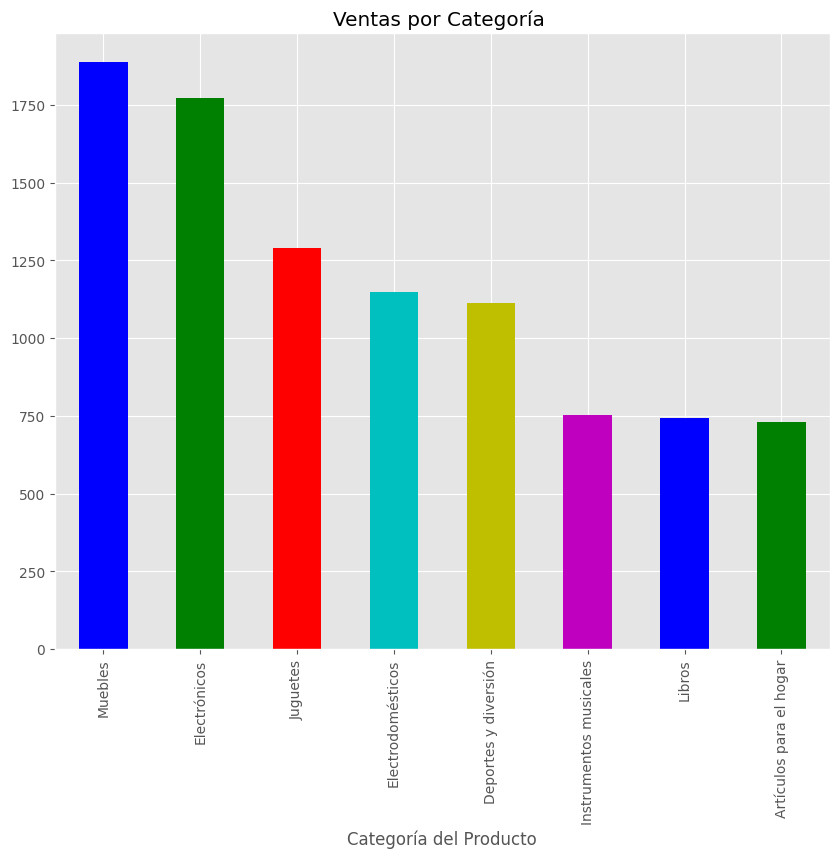

In [72]:
categorias_agrupadas.plot(kind="bar", x= categorias_agrupadas.index, y= categorias_agrupadas.values, color= ['b','g','r','c','y','m'], title="Ventas por Categoría ", figsize=(10, 8))
plt.show()

# 3. Calificación promedio de la tienda


La media de calificación de la tienda 1 es: 3.98 
La media de calificación de la tienda 2 es: 4.04 
La media de calificación de la tienda 3 es: 4.05 
La media de calificación de la tienda 4 es: 4.00 
 


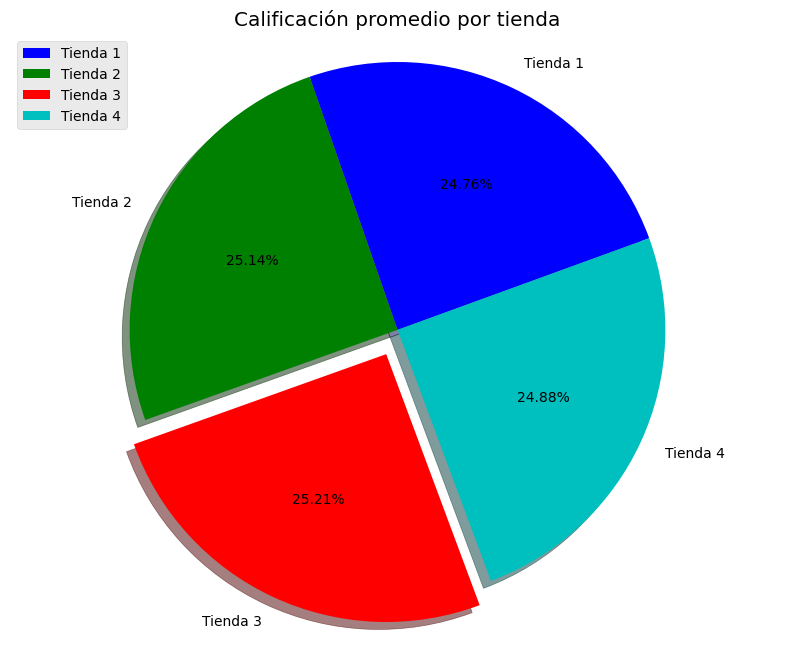

In [61]:
media_tienda1= tienda.iloc[:,7].mean()
media_tienda2= tienda2.iloc[:,7].mean()
media_tienda3= tienda3.iloc[:,7].mean()
media_tienda4= tienda4.iloc[:,7].mean()

print('La media de calificación de la tienda 1 es: {:,.2f} \nLa media de calificación de la tienda 2 es: {:,.2f} \nLa media de calificación de la tienda 3 es: {:,.2f} \nLa media de calificación de la tienda 4 es: {:,.2f} \n '.format(media_tienda1,media_tienda2,media_tienda3,media_tienda4))

plt.figure(figsize=(10, 8))
valores_media=[media_tienda1,media_tienda2,media_tienda3,media_tienda4]
destacar_media= (0,0,0.1,0)
plt.title('Calificación promedio por tienda')
plt.pie(x=valores_media, explode= destacar_media, labels= tiendas, autopct="%.2f%%", shadow=True, startangle=20, colors= ['b','g','r','c'])
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()


# 4. Productos más y menos vendidos

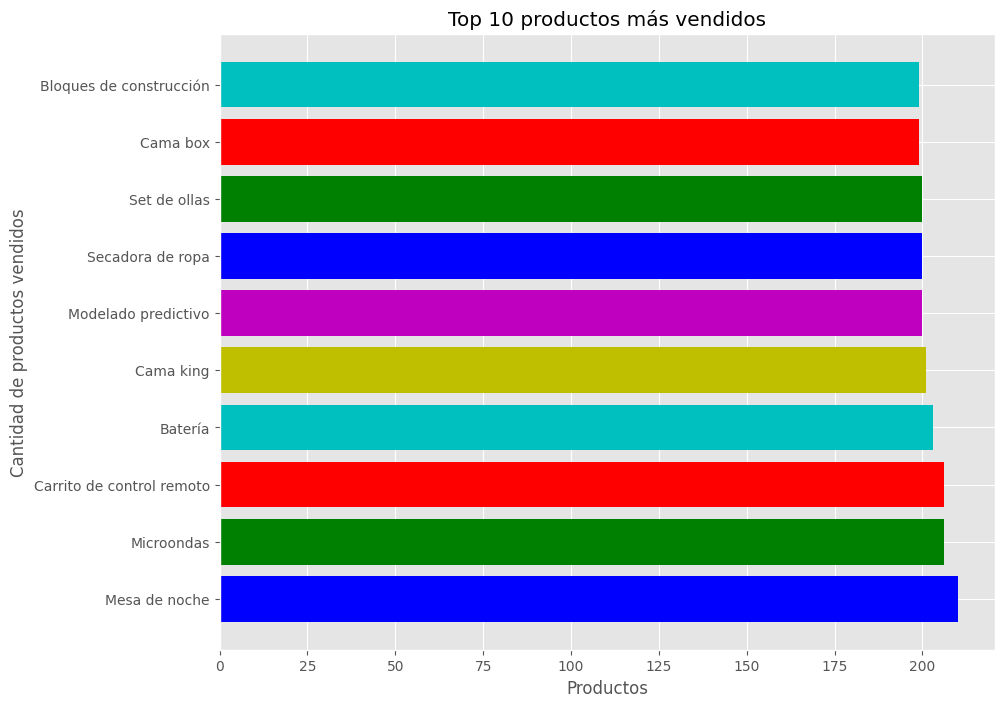

In [104]:
productos_vendidos_tienda1= tienda.groupby('Producto').size().sort_values(ascending=False)
productos_vendidos_tienda2= tienda2.groupby('Producto').size().sort_values(ascending=False)
productos_vendidos_tienda3= tienda3.groupby('Producto').size().sort_values(ascending=False)
productos_vendidos_tienda4= tienda4.groupby('Producto').size().sort_values(ascending=False)


# TODO Revisar si se puede mejorar la impresion de los resultados

productos_vendidos= pd.concat([tienda,tienda2,tienda3,tienda4])
productos_agrupados= productos_vendidos.groupby('Producto').size().sort_values(ascending=False).head(10)
productos_agrupados

plt.figure(figsize=(10, 8))
plt.barh(productos_agrupados.index, productos_agrupados.values, color= ['b','g','r','c','y','m'])
plt.xlabel("Productos")
plt.ylabel("Cantidad de productos vendidos")
plt.title("Top 10 productos más vendidos")
plt.show()





# 5. Envío promedio por tienda

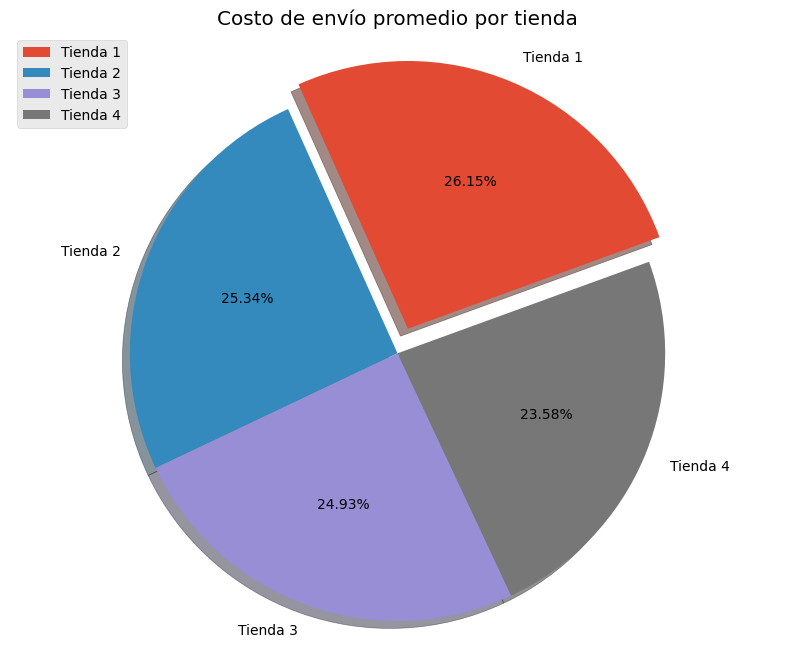

In [42]:
costo_envio_tienda1= tienda['Costo de envío'].mean().astype('int')
costo_envio_tienda2= tienda2['Costo de envío'].mean().astype('int')
costo_envio_tienda3= tienda3['Costo de envío'].mean().astype('int')
costo_envio_tienda4= tienda4['Costo de envío'].mean().astype('int')


# TODO Revisar si se puede mejorar la impresion de los resultados

plt.figure(figsize=(10, 8))
tiendas= ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
costo_envio= [costo_envio_tienda1,costo_envio_tienda2,costo_envio_tienda3,costo_envio_tienda4]
destacar= (0.1,0,0,0)
plt.style.use('ggplot')
plt.title('Costo de envío promedio por tienda')
plt.pie(x=costo_envio, explode= destacar, labels= tiendas, autopct="%.2f%%", shadow=True, startangle=20)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

